In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


In [27]:
X=[1.4, 3.5, 5.6]
Y=[0.4007954931819738, 0.594128102489774,  0.29802795523938164]

In [28]:
X=np.array(X)
Y=np.array(Y)

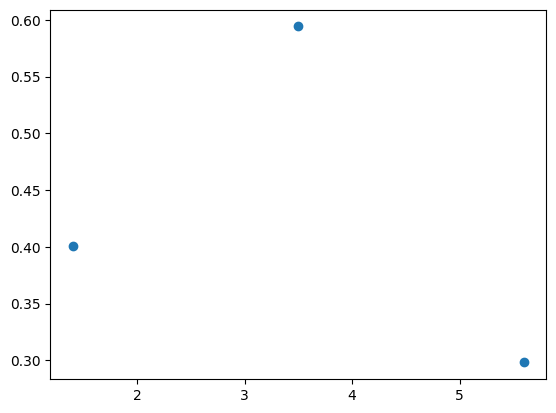

In [10]:
plt.scatter(X,Y)

In [11]:
Diff = np.zeros(( X.shape[0],Y.shape[0] ))
Diff[:,0] = Y


for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 

Diff

array([[ 0.40079549,  0.        ,  0.        ],
       [ 0.5941281 ,  0.19333261,  0.        ],
       [ 0.29802796, -0.29610015, -0.48943276]])

In [12]:
def InterpolacionNewton(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros(( X.shape[0],Y.shape[0] ))
    h = X[1]-X[0]
    
    Diff[:,0] = Y

    poly = 1.
    
    for i in range(1,len(X)):
        
        poly *= (x-X[i-1])
        
        for j in range(i,len(X)):
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 
    
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))
        
    return sum_

In [64]:
xt = np.linspace(0,np.max(X),100)
yt = []

for x in xt:
    yt.append(InterpolacionNewton(X,Y,x))

C:\Users\aleja\AppData\Local\Temp\ipykernel_12836\2893539191.py:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))


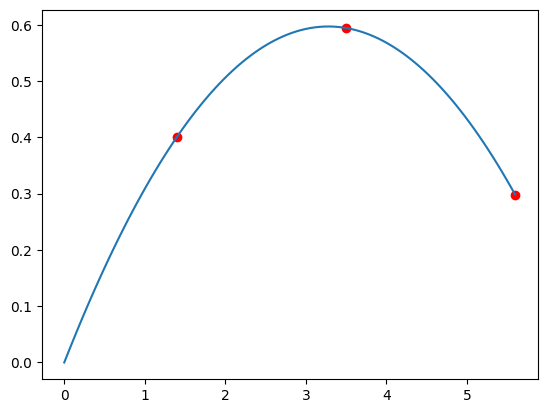

In [65]:
plt.scatter(X,Y,color='r')
plt.plot(xt,yt)

In [23]:
x = sym.Symbol('x',real=True)

In [24]:
y = InterpolacionNewton(X,Y,x)
y = sym.simplify(y)
y

C:\Users\aleja\AppData\Local\Temp\ipykernel_12836\2893539191.py:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))


-0.0554912422401579*x**2 + 0.363970234266202*x + 1.66533453693773e-16

In [50]:
def f(x):
    return -0.0554912422401579*x**(2)+0.363970234266202*x+1.66533453693773*10**(-16)


In [53]:
def derivada(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [54]:
vy=derivada(f,0)
vy

0.363970234266202

In [60]:
vp=np.sqrt(10**(2)-vy**(2))

In [63]:
vi=np.arctan(vy/vp)
vi

0.03640506433991643